In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Donnée

In [7]:
import datetime
import pandas_datareader.data as web

In [8]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2021, 6, 29)

## Action Pfizer

In [33]:
pfizer = web.DataReader("PFE", 'yahoo', start, end)
pfizer.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-06-23,39.660000,38.980000,39.630001,39.049999,22025400.0,39.049999
2021-06-24,39.349998,39.080002,39.139999,39.189999,13436500.0,39.189999
2021-06-25,39.410000,38.889999,39.119999,38.980000,22760200.0,38.980000
2021-06-28,39.209999,38.900002,39.009998,39.119999,19221600.0,39.119999
2021-06-29,39.285000,38.980000,39.130001,39.080002,12023986.0,39.080002


## Action Moderna

In [15]:
moderna = web.DataReader("MRNA", "yahoo", start, end)
moderna.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-07,22.750000,18.51,22.000000,18.600000,12995600,18.600000
2018-12-10,19.438999,18.00,18.900000,18.799999,4233300,18.799999
2018-12-11,20.660000,17.99,20.549999,18.010000,3435300,18.010000
2018-12-12,19.480000,18.02,18.549999,18.680000,2590700,18.680000
2018-12-13,19.290001,18.68,19.250000,18.760000,1608600,18.760000


## Cours CureVac

In [34]:
curevac = web.DataReader("CVAC", "yahoo", start, end)
curevac.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-08-14,56.000000,36.150002,44.490002,55.900002,23677700,55.900002
2020-08-17,85.000000,67.120003,84.400002,77.199997,14222900,77.199997
2020-08-18,73.050003,65.089996,72.417000,65.699997,4106000,65.699997
2020-08-19,67.989998,55.049999,67.705002,56.900002,5240500,56.900002
2020-08-20,66.889999,60.700001,63.000000,66.000000,7037600,66.000000


## Cours interceptPharma

In [35]:
intercept = web.DataReader("ICPT", "yahoo", start, end)
intercept.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-10-11,20.400000,18.740000,19.400000,19.400000,813300,19.400000
2012-10-12,19.750000,18.559999,19.010000,19.049999,49900,19.049999
2012-10-15,19.549999,18.590000,19.000000,19.260000,54300,19.260000
2012-10-16,19.910000,19.200001,19.290001,19.670000,80500,19.670000
2012-10-17,20.000000,19.260000,20.000000,19.780001,13600,19.780001


## Prix ouverture

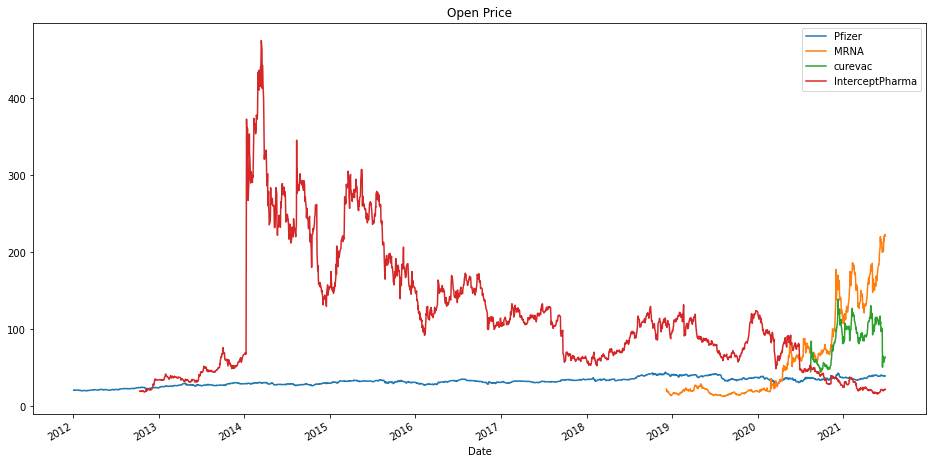

In [36]:
pfizer['Open'].plot(label='Pfizer',figsize=(16,8),title='Open Price')
moderna['Open'].plot(label='MRNA')
curevac['Open'].plot(label='curevac')
intercept['Open'].plot(label='InterceptPharma')
plt.legend()

## Volume actions négocier par jours

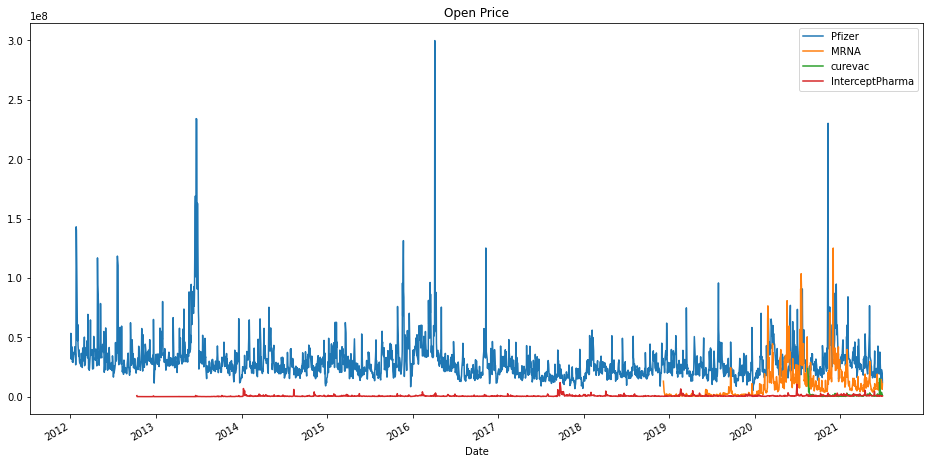

In [37]:
pfizer['Volume'].plot(label='Pfizer',figsize=(16,8),title='Open Price')
moderna['Volume'].plot(label='MRNA')
curevac['Volume'].plot(label='curevac')
intercept['Volume'].plot(label='InterceptPharma')
plt.legend()

In [22]:
#pic la veille de la sortie du vaccin
moderna['Volume'].idxmax()

Timestamp('2020-12-01 00:00:00')

## Prix d'ouverture multiplié par le négocié

In [38]:
pfizer['Total Traded'] = pfizer['Open']*pfizer['Volume']
moderna['Total Traded'] = moderna['Open']*moderna['Volume']
curevac['Total Traded'] = curevac['Open']*curevac['Volume']
intercept['Total Traded'] = intercept['Open']*intercept['Volume']

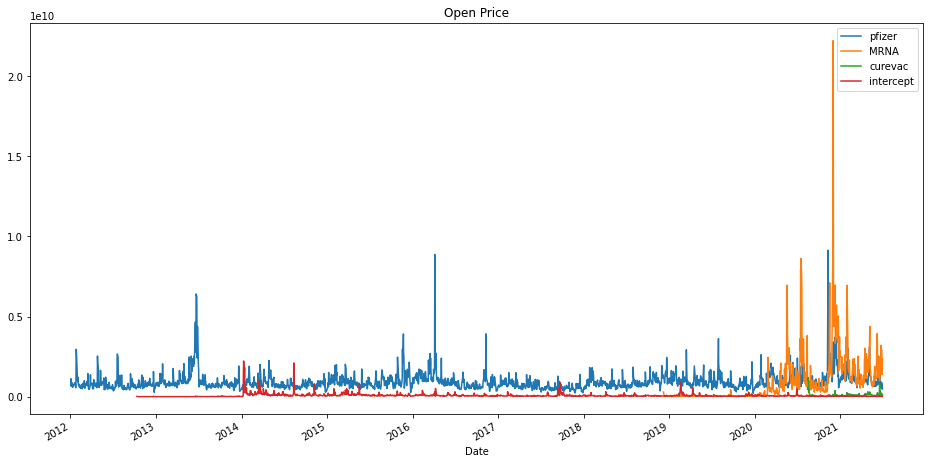

In [39]:
pfizer['Total Traded'].plot(label='pfizer',figsize=(16,8),title='Open Price')
moderna['Total Traded'].plot(label='MRNA')
curevac['Total Traded'].plot(label='curevac')
intercept['Total Traded'].plot(label='intercept')
plt.legend()

In [40]:
# https://www.journaldemontreal.com/2020/12/18/tesla-entre-dans-un-club-select-de-wall-street-une-opportunite-pour-les-petits-porteurs
pfizer['Total Traded'].idxmax()

Timestamp('2020-11-09 00:00:00')

## Moyenne glissante et mobile Tesla

<AxesSubplot:xlabel='Date'>

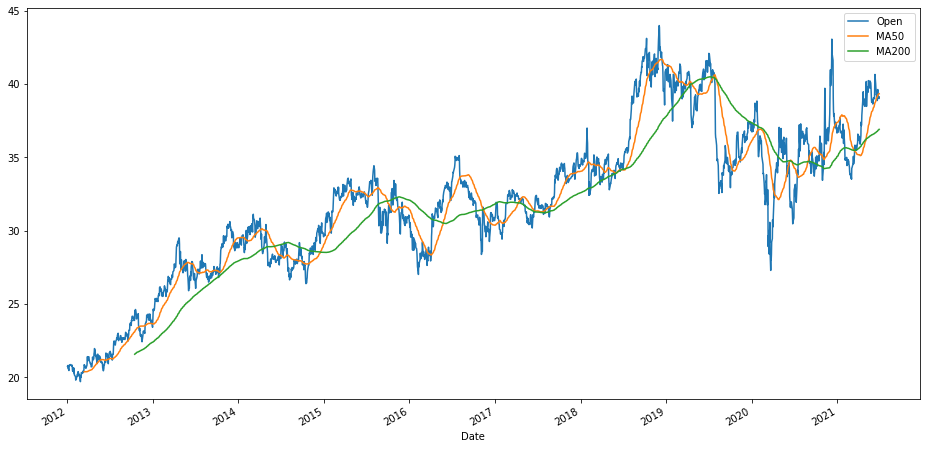

In [41]:
pfizer['MA50'] = pfizer['Open'].rolling(50).mean()
pfizer['MA200'] = pfizer['Open'].rolling(200).mean()
pfizer[['Open','MA50','MA200']].plot(label='tesla',figsize=(16,8))

## Relation entre les actions

In [43]:
from pandas.plotting import scatter_matrix

In [44]:
car_comp = pd.concat([pfizer['Open'],moderna['Open'],curevac['Open'],intercept['Open']],axis=1)

In [45]:
car_comp.columns = ['pfizer Open','moderna Open','curevac Open','intercept Open']

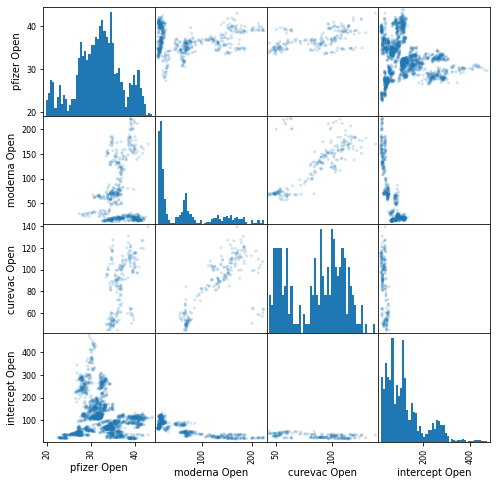

In [46]:
# Vous pouvez utiliser un point-virgule pour supprimer l'impression des axes
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

## Chandelier Pfizer

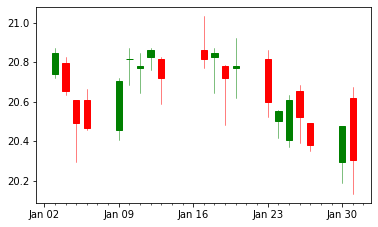

In [49]:
from mplfinance.original_flavor import candlestick_ohlc

from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY

# Réinitialiser l'index pour obtenir une colonne des dates de janvier
pfizer_reset = pfizer.loc['2012-01':'2012-01'].reset_index()

# Créer une nouvelle colonne de valeurs numériques de "date" à utiliser par matplotlib
pfizer_reset['date_ax'] = pfizer_reset['Date'].apply(lambda date: date2num(date))
pfizer_values = [tuple(vals) for vals in pfizer_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]

mondays = WeekdayLocator(MONDAY) # major ticks on the mondays
alldays = DayLocator() # minor ticks on the days
weekFormatter = DateFormatter('%b %d') # e.g., Jan 12
dayFormatter = DateFormatter('%d') # e.g., 12

# Tracé
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, pfizer_values, width=0.6, colorup='g',colordown='r');

## Rendement Quotidient en %

In [54]:
pfizer['returns'] = pfizer['Close'].pct_change(1)
moderna['returns'] = moderna['Close'].pct_change(1)
curevac['returns'] = curevac['Close'].pct_change(1)
intercept['returns'] = intercept['Close'].pct_change(1)


In [53]:
pfizer.tail()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns
Date,,,,,,,,,,
2021-06-23,39.660000,38.980000,39.630001,39.049999,22025400.0,39.049999,8.728666e+08,39.2312,36.818798,-0.014138
2021-06-24,39.349998,39.080002,39.139999,39.189999,13436500.0,39.189999,5.259046e+08,39.2706,36.841206,0.003585
2021-06-25,39.410000,38.889999,39.119999,38.980000,22760200.0,38.980000,8.903790e+08,39.3078,36.864652,-0.005358
2021-06-28,39.209999,38.900002,39.009998,39.119999,19221600.0,39.119999,7.498346e+08,39.3306,36.887975,0.003592
2021-06-29,39.285000,38.980000,39.130001,39.080002,12023986.0,39.080002,4.704986e+08,39.3412,36.914081,-0.001022


In [55]:
moderna.tail()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2021-06-23,224.570007,205.550003,219.979996,212.039993,14558400,212.039993,3.202557e+09,-0.042103
2021-06-24,221.490005,213.460007,214.380005,220.139999,8171900,220.139999,1.751892e+09,0.038200
2021-06-25,226.509995,216.330002,221.259995,219.940002,13311200,219.940002,2.945236e+09,-0.000908
2021-06-28,225.091003,215.600006,223.000000,222.940002,6185100,222.940002,1.379277e+09,0.013640
2021-06-29,238.399994,219.500000,221.190002,234.080002,10673494,234.080002,2.360870e+09,0.049969


## histogramme rendement

<AxesSubplot:>

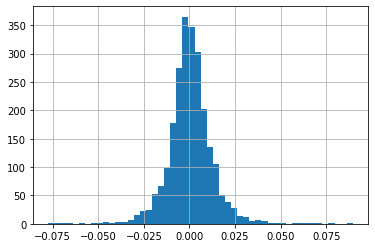

In [56]:
pfizer['returns'].hist(bins=50)

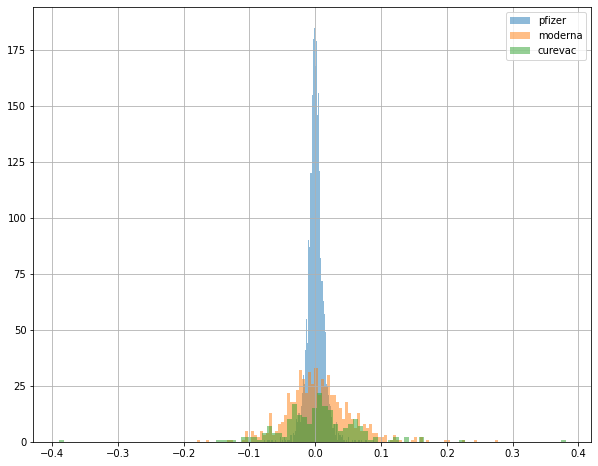

In [59]:
pfizer['returns'].hist(bins=100,label='pfizer',figsize=(10,8),alpha=0.5)
moderna['returns'].hist(bins=100,label='moderna',alpha=0.5)
curevac['returns'].hist(bins=100,label='curevac',alpha=0.5)
# intercept['returns'].hist(bins=100,label='intercept',alpha=0.5)
plt.legend()

## KDE

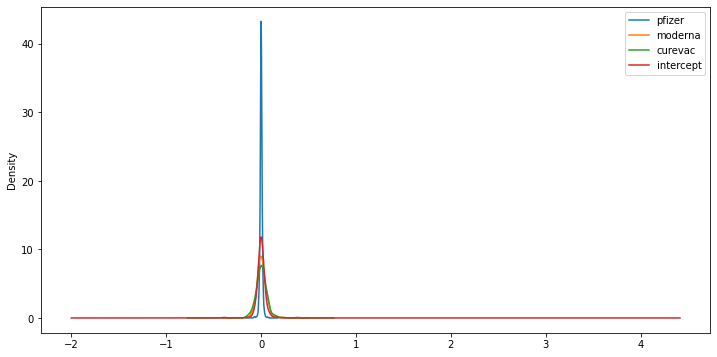

In [70]:
pfizer['returns'].plot(kind='kde',label='pfizer',figsize=(12,6))
moderna['returns'].plot(kind='kde',label='moderna')
curevac['returns'].plot(kind='kde',label='curevac')
intercept['returns'].plot(kind='kde',label='intercept')
plt.legend()

## Diagramme boite

<AxesSubplot:>

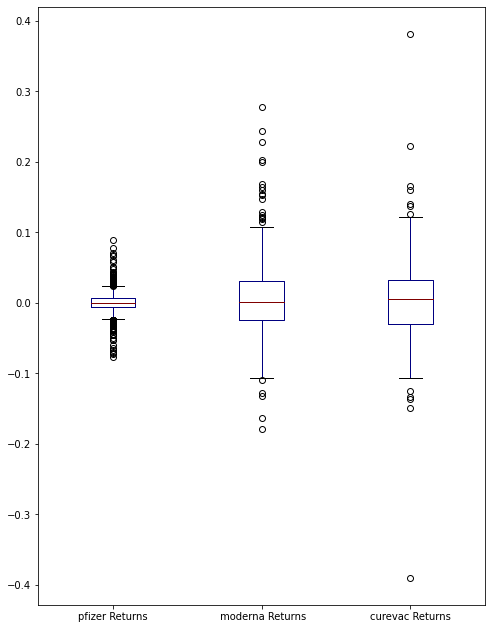

In [64]:
box_df = pd.concat([pfizer['returns'],moderna['returns'],curevac['returns']],axis=1)
box_df.columns = ['pfizer Returns',' moderna Returns','curevac Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

## Comparaison des rendements quotidiens entre les actions

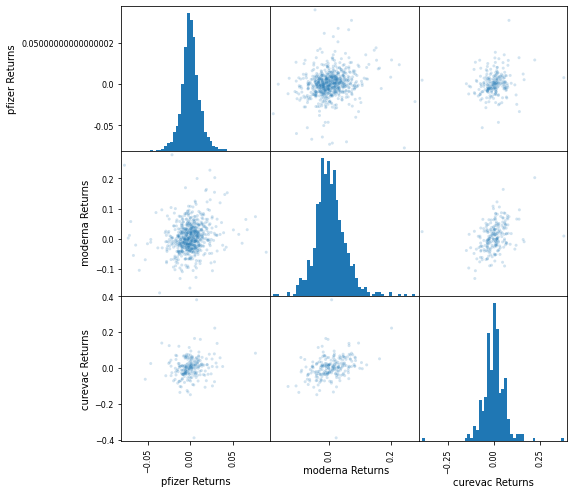

In [65]:
scatter_matrix(box_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

<AxesSubplot:xlabel='pfizer Returns', ylabel='curevac Returns'>

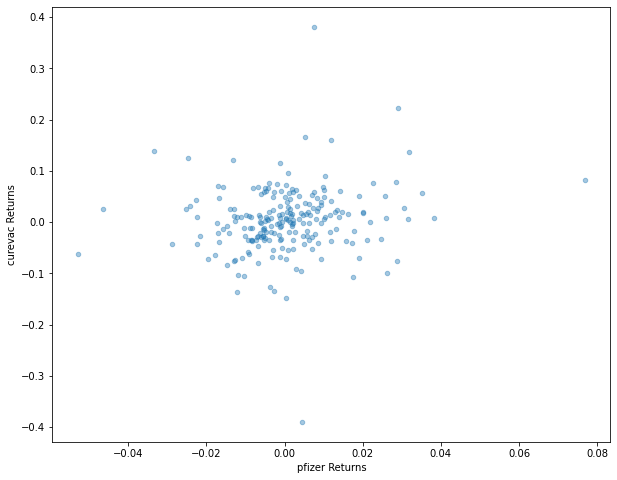

In [69]:
box_df.plot(kind='scatter',x='pfizer Returns',y='curevac Returns',alpha=0.4,figsize=(10,8))

## Rendement cumulatif

In [72]:
pfizer['Cumulative Return'] = (1 + pfizer['returns']).cumprod()
moderna['Cumulative Return'] = (1 + moderna['returns']).cumprod()
curevac['Cumulative Return'] = (1 + curevac['returns']).cumprod()
intercept['Cumulative Return'] = (1 + intercept['returns']).cumprod()

In [74]:
pfizer.tail()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA200,returns,Cumulative Return
Date,,,,,,,,,,,
2021-06-23,39.660000,38.980000,39.630001,39.049999,22025400.0,39.049999,8.728666e+08,39.2312,36.818798,-0.014138,1.873405
2021-06-24,39.349998,39.080002,39.139999,39.189999,13436500.0,39.189999,5.259046e+08,39.2706,36.841206,0.003585,1.880121
2021-06-25,39.410000,38.889999,39.119999,38.980000,22760200.0,38.980000,8.903790e+08,39.3078,36.864652,-0.005358,1.870046
2021-06-28,39.209999,38.900002,39.009998,39.119999,19221600.0,39.119999,7.498346e+08,39.3306,36.887975,0.003592,1.876763
2021-06-29,39.285000,38.980000,39.130001,39.080002,12023986.0,39.080002,4.704986e+08,39.3412,36.914081,-0.001022,1.874844


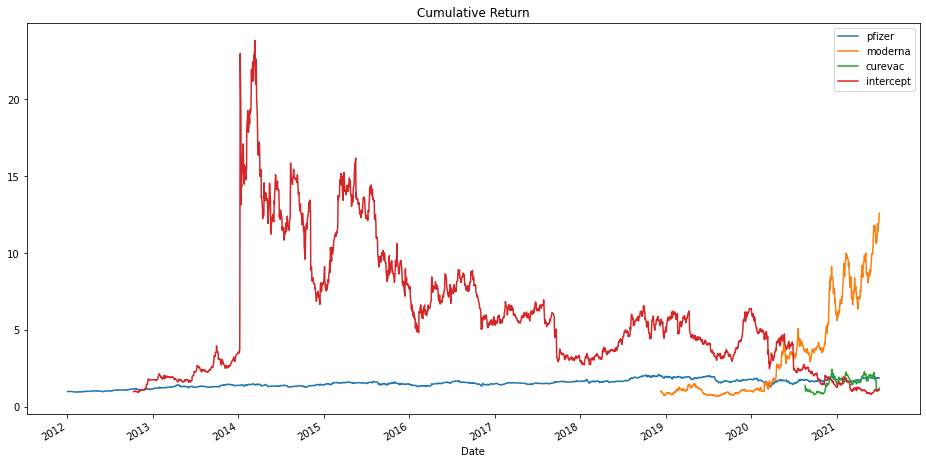

In [75]:
pfizer['Cumulative Return'].plot(label='pfizer',figsize=(16,8),title='Cumulative Return')
moderna['Cumulative Return'].plot(label='moderna')
curevac['Cumulative Return'].plot(label='curevac')
intercept['Cumulative Return'].plot(label='intercept')
plt.legend()

## Opitmisation portefollio

In [77]:
import quandl

In [79]:
pfizer["Close"].head()

Date
2012-01-03    20.844402
2012-01-04    20.654650
2012-01-05    20.493359
2012-01-06    20.464895
2012-01-09    20.702087
Name: Close, dtype: float64

In [93]:

stocks = pd.concat([pfizer['Close'],moderna['Close'],curevac['Close'],intercept['Close']],axis=1)
stocks.columns = ['pfizer','moderna','curevac','intercept']

In [94]:
stocks.tail()

,pfizer,moderna,curevac,intercept
Date,,,,
2021-06-23,39.049999,212.039993,56.910000,20.780001
2021-06-24,39.189999,220.139999,59.759998,21.440001
2021-06-25,38.980000,219.940002,63.259998,22.059999
2021-06-28,39.119999,222.940002,63.610001,21.700001
2021-06-29,39.080002,234.080002,67.459999,21.090000


In [95]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

pfizer       0.000342
moderna      0.005218
curevac      0.003058
intercept    0.001661
dtype: float64

## Simulation de milliers de répartitions possibles

<AxesSubplot:xlabel='Date'>

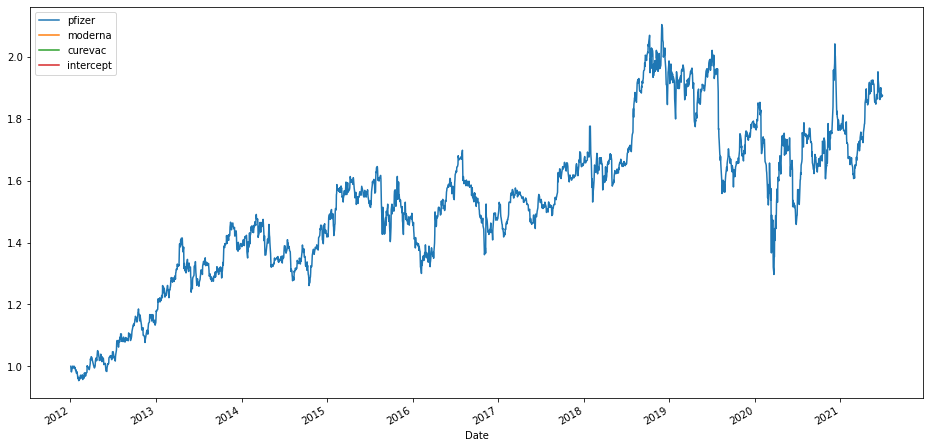

In [98]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot(figsize=(16,8))

In [88]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,pfizer,moderna,curevac,intercept
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,-0.009103,NaN,NaN,NaN
2012-01-05,-0.007809,NaN,NaN,NaN
2012-01-06,-0.001389,NaN,NaN,NaN
2012-01-09,0.011590,NaN,NaN,NaN


## Rendements logarithmiques vs. Rendements arithmétiques

In [99]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,pfizer,moderna,curevac,intercept
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,-0.009145,NaN,NaN,NaN
2012-01-05,-0.007840,NaN,NaN,NaN
2012-01-06,-0.001390,NaN,NaN,NaN
2012-01-09,0.011524,NaN,NaN,NaN


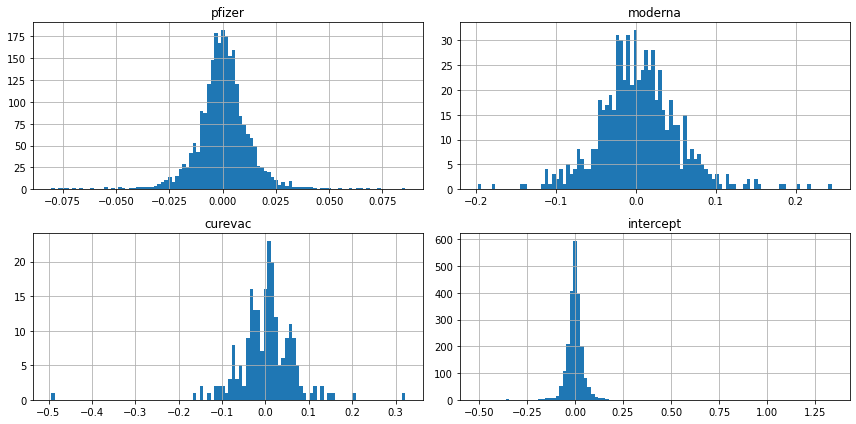

In [100]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [101]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pfizer,2387.0,0.000263,0.012554,-0.080501,-0.005777,0.000000,0.006269,0.085817
moderna,643.0,0.003939,0.050175,-0.198047,-0.024451,0.001175,0.030495,0.245380
curevac,219.0,0.000858,0.067193,-0.494156,-0.030436,0.005518,0.031497,0.322835
intercept,2191.0,0.000038,0.052287,-0.506405,-0.020407,-0.000564,0.019580,1.337862


In [102]:
log_ret.mean() * 252

pfizer       0.066355
moderna      0.992520
curevac      0.216295
intercept    0.009607
dtype: float64

In [103]:
# Calculer la covariance des colonnes par paires
log_ret.cov()

,pfizer,moderna,curevac,intercept
pfizer,0.000158,0.000139,0.000129,0.000122
moderna,0.000139,0.002518,0.001068,0.000192
curevac,0.000129,0.001068,0.004515,0.000464
intercept,0.000122,0.000192,0.000464,0.002734


In [104]:
log_ret.cov()*252 # multiplier par les jours ouvrables

,pfizer,moderna,curevac,intercept
pfizer,0.039715,0.035104,0.032436,0.030853
moderna,0.035104,0.634423,0.269128,0.048375
curevac,0.032436,0.269128,1.137764,0.116819
intercept,0.030853,0.048375,0.116819,0.688938


## Exécution pour une certaine répartition aléatoire

In [105]:
# Règlage du seed (optionnel)
np.random.seed(101)

# Colonnes d'actions (Stocks)
print('Stocks')
print(stocks.columns)
print('\n')

# Créer des poids aléatoires
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Re-pondération des Poids
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Rendement attendu ou escompté
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# variance attendue ou escomptée
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Ratio de Sharpe
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Stocks
Index(['pfizer', 'moderna', 'curevac', 'intercept'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.4727596266944539


Expected Volatility
0.4146793864619469


Sharpe Ratio
1.140060591697236


In [106]:

num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Créer des poids aléatoires
    weights = np.array(np.random.random(4))

    # (re)Pondération des poids
    weights = weights / np.sum(weights)
    
    # Sauvegarde des Poids
    all_weights[ind,:] = weights

    # rendement attendu
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # variance Attendue
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Ratio de Sharpe
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [107]:
sharpe_arr.max()

1.239569124161211

In [108]:
sharpe_arr.argmax()

11768

In [109]:
all_weights[1419,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [110]:
max_sr_ret = ret_arr[1419]
max_sr_vol = vol_arr[1419]

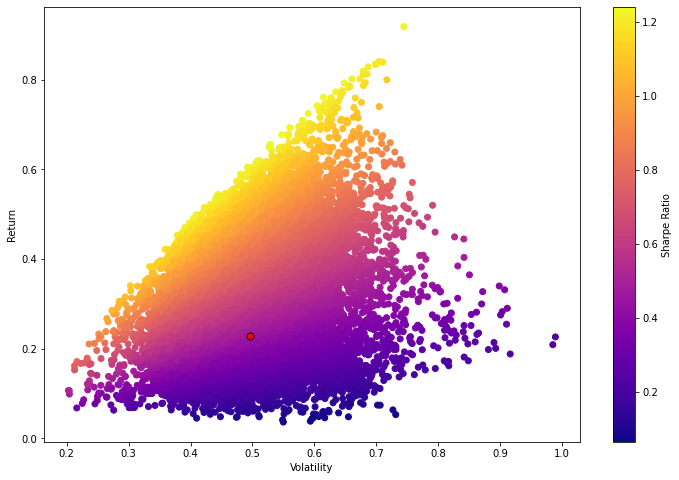

In [111]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Ajouter un point rouge pour le SR max
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

## Optimisation mathématique

In [112]:
def get_ret_vol_sr(weights):
    """
    Prends en argument les poids, retourne un tableau de rendement,
    volatilité et Ratio de Sharpe
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [113]:
from scipy.optimize import minimize

In [114]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.
    
    Parameters
    ----------
    fun : callable
        The objective function to be minimized.
    
            ``fun(x, *args) -> float``
    
        where ``x`` is an 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where 'n' is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of
    
            - 'Nelder-Mead' :ref:`(see her

In [115]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [116]:
# Contraintes
def check_sum(weights):
    '''
    Retourne 0 si la somme des poids vaut 1.0
    '''
    return np.sum(weights) - 1

In [117]:
# Par convention de fonction de minimisation, il devrait s'agir d'une fonction qui retourne zéro pour certaines conditions
cons = ({'type':'eq','fun': check_sum})

In [118]:
# 0-1 pour chaque poids
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [119]:
# Hypothèse initiale (répartition égale)
init_guess = [0.25,0.25,0.25,0.25]

In [120]:
# Sequential Least Squares Programming (SLSQP)
# Programmation séquentielle des moindres carrés
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [121]:
opt_results

     fun: -1.2474799232836276
     jac: array([-1.05485320e-04,  2.05039978e-05,  3.11247066e-01,  1.10481918e-01])
 message: 'Optimization terminated successfully'
    nfev: 35
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.62749319e-01, 8.37250681e-01, 2.60208521e-17, 0.00000000e+00])

In [122]:
opt_results.x

array([1.62749319e-01, 8.37250681e-01, 2.60208521e-17, 0.00000000e+00])

In [123]:
get_ret_vol_sr(opt_results.x)

array([0.84178718, 0.67479016, 1.24747992])

## Portefeuilles Optimaux (Frontière Efficiente)

In [124]:
# Nos rendements vont de 0 à 0.3
# Créer un nombre de points linéairement espacés pour calculer x dessus
frontier_y = np.linspace(0,0.3,100) # Changez 100 à un chiffre inférieur pour les ordinateurs plus lents !

In [125]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1]

In [126]:
frontier_volatility = []

for possible_return in frontier_y:
    # contraintes
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])


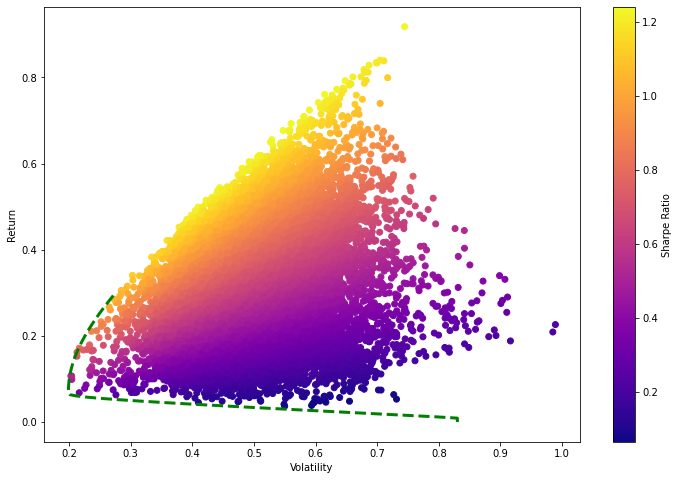

In [128]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Ajouter une ligne de frontière
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)